In [1]:
# initial imports
import pandas as pd 
import pandas_datareader.data as web
from pandas import Series, DataFrame
from wordcloud import WordCloud
import numpy as np
import datetime as dt
import re

import matplotlib.pyplot as plt
%matplotlib inline

from warnings import filterwarnings
filterwarnings("ignore")

C:\Users\kelvi\Anaconda3\envs\learn-env\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


<img src="images/new_osemn.png" width=600>

Importing real time stock data via pandas_datareader.data as web, numerous features, the frequency of this data is daily by default, the date is automatically a pandas datetime obj and is already placed on the x axis so there's no need to perform a pivot method.
[pandas-datareader](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html)

### Obtain:

In [2]:
# import data via web with this implementation there's no need to change date to datetime obj or perform a pivot  
# slicing(subsetting) just change the start and end parameters below:
start = dt.datetime(2017, 1, 1)
end = dt.datetime(2019, 1, 1)

SNP = web.DataReader('^GSPC', 'yahoo', start, end).sort_index(ascending=False) # index

In [3]:
import pandas as pd
from pandas import DataFrame
import json

tweet = open('data/condensed_2017.json')
tweets = open('data/condensed_2018.json')

tweet17 = json.load(tweet) # 2017 tweets
tweet18 = json.load(tweets) # 2018 tweets

### Scrub:
###### S&P 500

In [4]:
SNP.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,2509.239990,2482.820068,2498.939941,2506.850098,3442870000,2506.850098
2018-12-28,2520.270020,2472.889893,2498.770020,2485.739990,3702620000,2485.739990
2018-12-27,2489.100098,2397.939941,2442.500000,2488.830078,4096610000,2488.830078
2018-12-26,2467.760010,2346.580078,2363.120117,2467.699951,4233990000,2467.699951
2018-12-24,2410.340088,2351.100098,2400.560059,2351.100098,2613930000,2351.100098


In [5]:
# We'll use the S&P 500 Index
SNP.index

DatetimeIndex(['2018-12-31', '2018-12-28', '2018-12-27', '2018-12-26',
               '2018-12-24', '2018-12-21', '2018-12-20', '2018-12-19',
               '2018-12-18', '2018-12-17',
               ...
               '2017-01-17', '2017-01-13', '2017-01-12', '2017-01-11',
               '2017-01-10', '2017-01-09', '2017-01-06', '2017-01-05',
               '2017-01-04', '2017-01-03'],
              dtype='datetime64[ns]', name='Date', length=502, freq=None)

In [6]:
# only interested in the Closing price of the trading day
SNP.drop(['High', 'Low', 'Open', 'Adj Close', 'Volume'], axis= 1, inplace=True) 

In [7]:
# tail is the most current data
# this data is daily frequency
print(SNP.head())
print(SNP.tail())

                  Close
Date                   
2018-12-31  2506.850098
2018-12-28  2485.739990
2018-12-27  2488.830078
2018-12-26  2467.699951
2018-12-24  2351.100098
                  Close
Date                   
2017-01-09  2268.899902
2017-01-06  2276.979980
2017-01-05  2269.000000
2017-01-04  2270.750000
2017-01-03  2257.830078


In [8]:
SNP.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 502 entries, 2018-12-31 to 2017-01-03
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   502 non-null    float64
dtypes: float64(1)
memory usage: 7.8 KB


In [9]:
# initial shape based on the start and end parameters of the imports
SNP.shape

(502, 1)

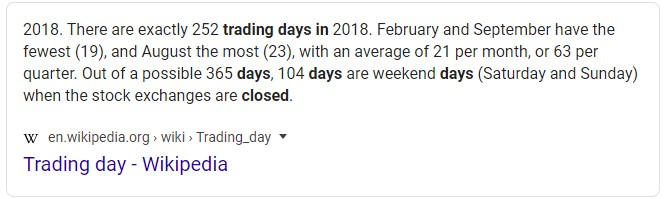

In [10]:
# annual number of trading days limited (of course)
from IPython.display import Image
Image(filename='images/trading_day.jpg')

In [11]:
SNP.describe

<bound method NDFrame.describe of                   Close
Date                   
2018-12-31  2506.850098
2018-12-28  2485.739990
2018-12-27  2488.830078
2018-12-26  2467.699951
2018-12-24  2351.100098
...                 ...
2017-01-09  2268.899902
2017-01-06  2276.979980
2017-01-05  2269.000000
2017-01-04  2270.750000
2017-01-03  2257.830078

[502 rows x 1 columns]>

In [12]:
# no missing values, daily returns
SNP.isna().sum()

Close    0
dtype: int64

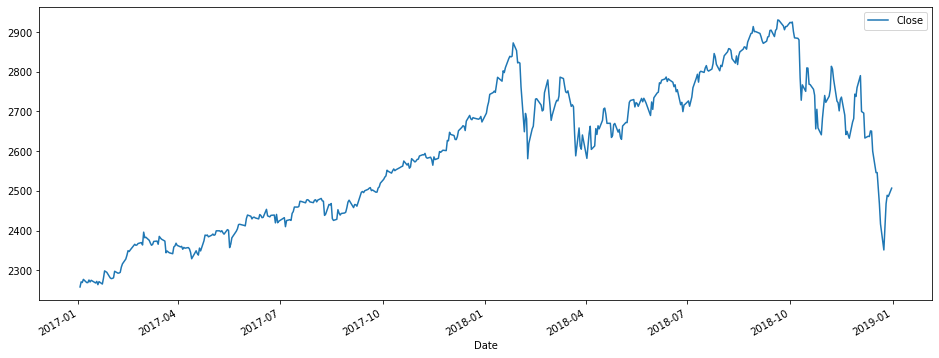

In [13]:
# line plot
SNP.plot(figsize = (16,6));

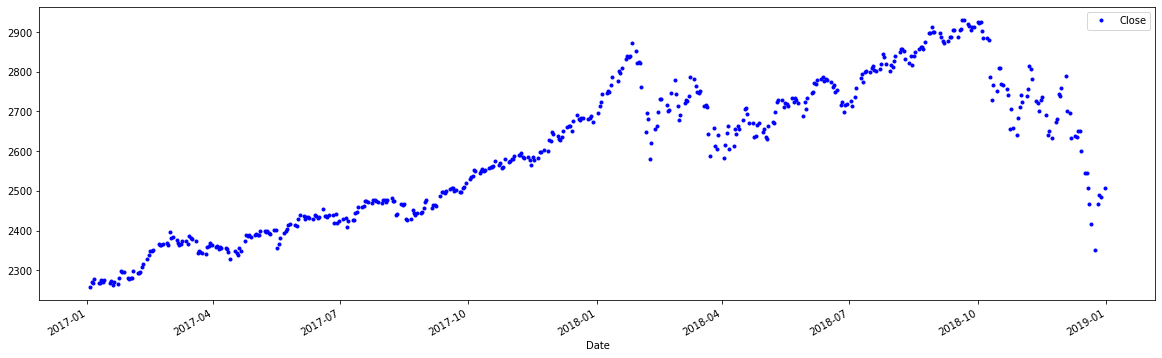

In [14]:
# dot plot
# this looks good very similiar to the line plot no outliers just pure data points
SNP.plot(figsize=(20,6), style= '.b');

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0EDB27160>,
      dtype=object)

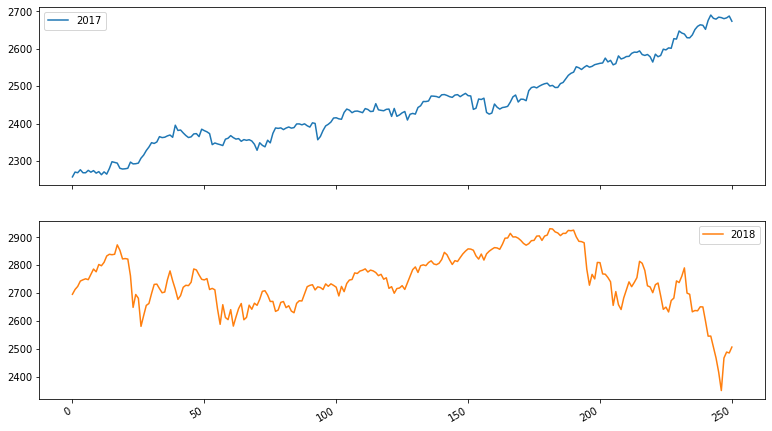

In [15]:
# Use pandas grouper to group values using annual frequency
year_groups = SNP['Close'].groupby(pd.Grouper(freq ='A'))

# Create a new DataFrame and store yearly values in columns 
SNP_annual = pd.DataFrame()

for yr, group in year_groups:
    SNP_annual[yr.year] = group.values
    
# Plot the yearly groups as subplots
SNP_annual.plot(figsize= (13,8), subplots= True, legend=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0EDBD6048>]],
      dtype=object)

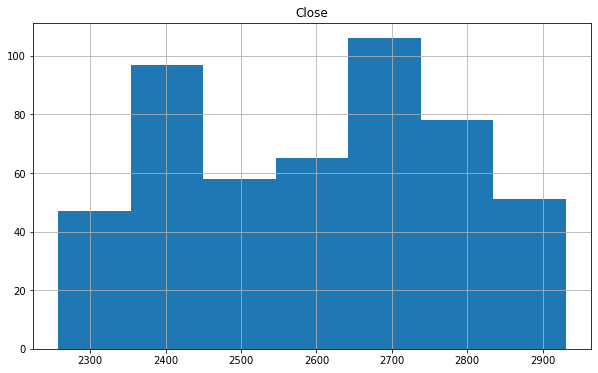

In [16]:
# histogram
SNP.hist(figsize = (10,6), bins= 7)

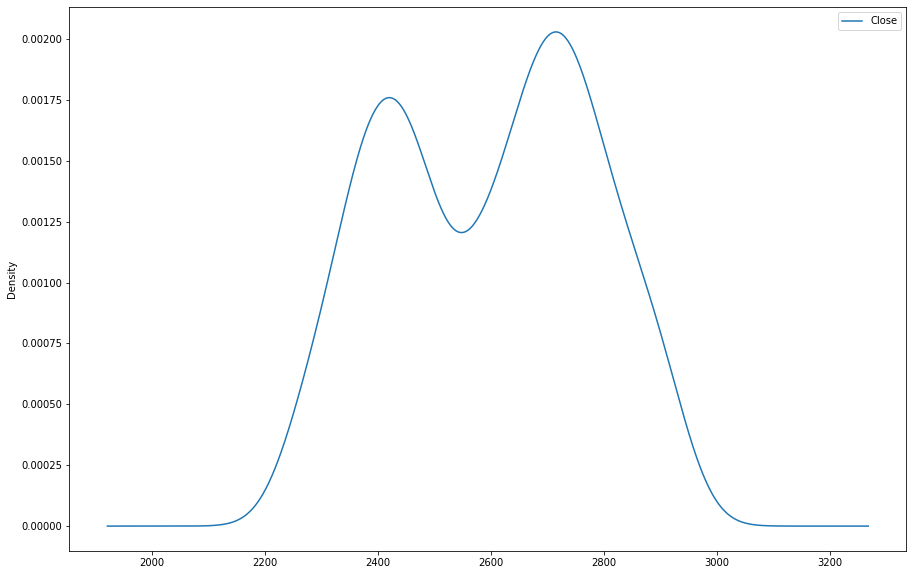

In [17]:
# density plot
SNP.plot(kind='kde', figsize = (15,10))

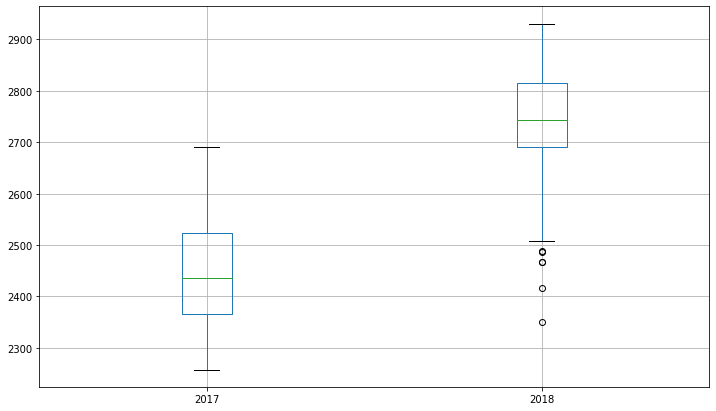

In [18]:
# good for spotting outliers, not that there are any in this data
SNP_annual.boxplot(figsize = (12,7))

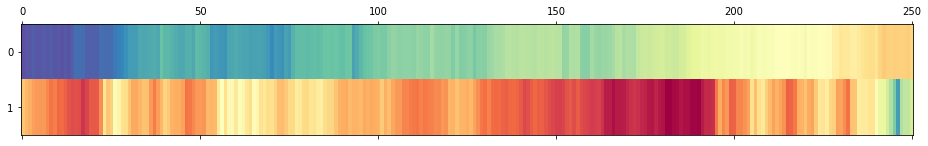

In [19]:
# time series heat map
year_matrix = SNP_annual.T
plt.matshow(year_matrix, interpolation=None, aspect='auto', cmap=plt.cm.Spectral_r)

##### Stationarity
The stationarity was performed much later in this process and the numbers were horrendous, upon gathering some domain knowledge on time series data namely predicting stock, this type of data is susceptible to stationarity over any trending or seasonality issues. 

In [20]:
# Create a function to check for the stationarity of a given time series using rolling stats and DF test
# Collect and package the code from previous labs
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller Test
    dftest = adfuller(TS['Close'])
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    plt.plot(TS, color='blue',label='Original')
    plt.plot(roll_mean, color='red', label='Rolling Mean')
    plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

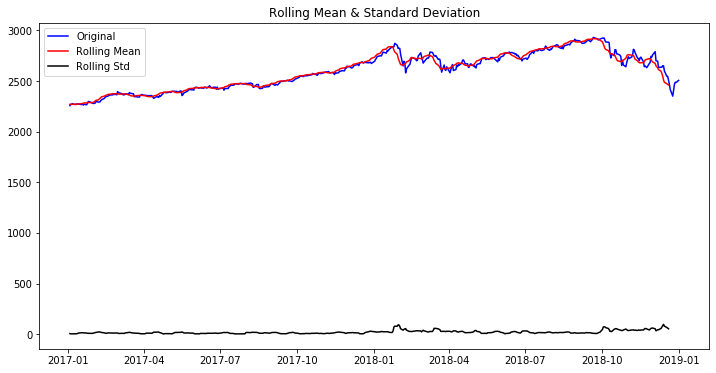

Results of Dickey-Fuller Test: 

Test Statistic                  -0.297582
p-value                          0.925846
#Lags Used                       8.000000
Number of Observations Used    493.000000
Critical Value (1%)             -3.443684
Critical Value (5%)             -2.867420
Critical Value (10%)            -2.569902
dtype: float64


In [21]:
stationarity_check(SNP)

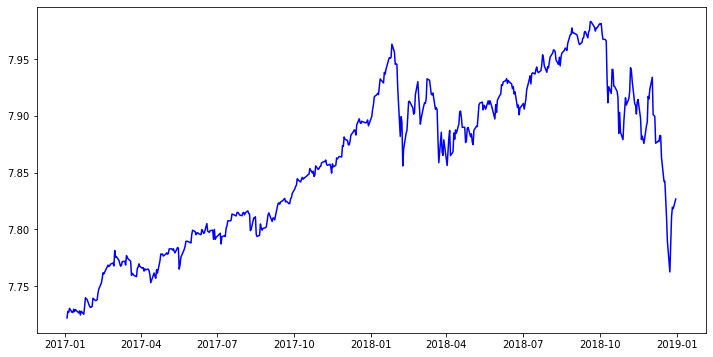

In [22]:
# Plot a log transform
ts_log = np.log(SNP)
fig = plt.figure(figsize=(12,6))
plt.plot(ts_log, color='blue');

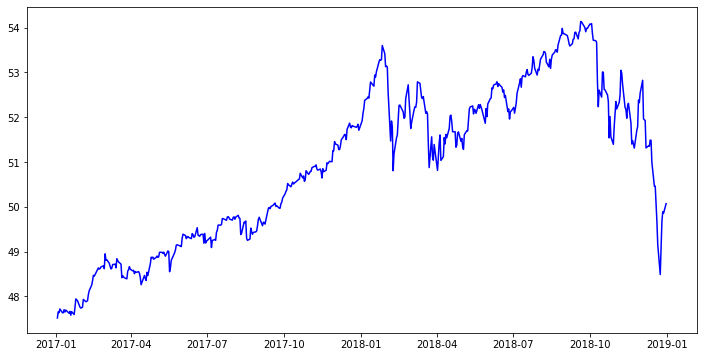

In [23]:
# Plot a square root transform
ts_sqrt = np.sqrt(SNP)
fig = plt.figure(figsize=(12,6))
plt.plot(ts_sqrt, color='blue');

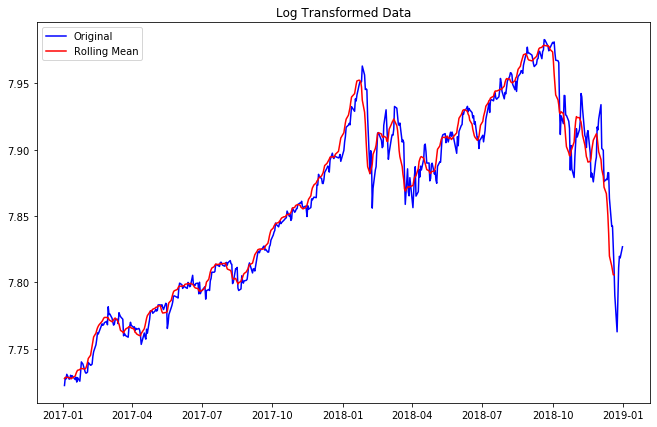

In [24]:
# subtracting the rolling mean
roll_mean = np.log(SNP).rolling(window=7).mean()
fig = plt.figure(figsize=(11,7))
plt.plot(np.log(SNP), color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Log Transformed Data')
plt.show(block=False) 

In [25]:
# Subtract the moving average from the log transformed data
data_minus_roll_mean = np.log(SNP) - roll_mean
# Print the first 10 rows
data_minus_roll_mean.head(10) 

,Close
Date,
2018-12-31,NaN
2018-12-28,NaN
2018-12-27,NaN
2018-12-26,NaN
2018-12-24,NaN
2018-12-21,NaN
2018-12-20,0.005298
2018-12-19,0.021190
2018-12-18,0.033274


In [26]:
# Drop the missing values
data_minus_roll_mean.dropna(inplace=True)

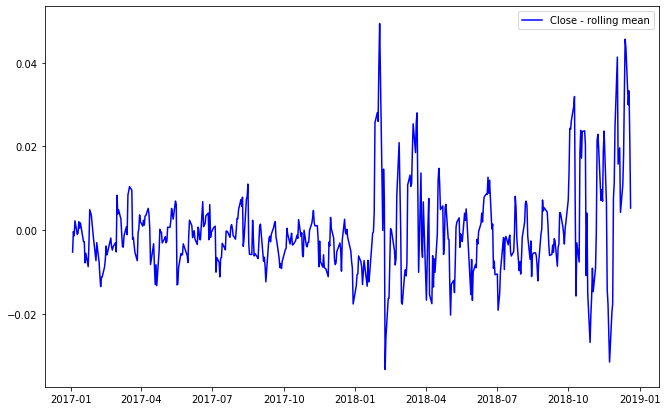

In [27]:
fig = plt.figure(figsize=(11,7))
plt.plot(data_minus_roll_mean, color='blue',label='Close - rolling mean')
plt.legend(loc='best')
plt.show(block=False)

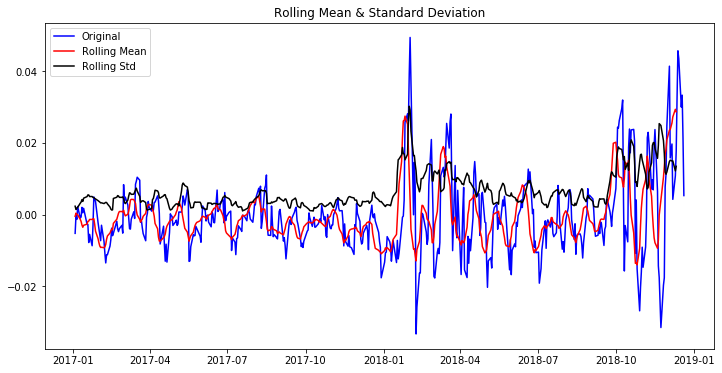

Results of Dickey-Fuller Test: 

Test Statistic                -7.109929e+00
p-value                        3.963318e-10
#Lags Used                     9.000000e+00
Number of Observations Used    4.860000e+02
Critical Value (1%)           -3.443877e+00
Critical Value (5%)           -2.867505e+00
Critical Value (10%)          -2.569947e+00
dtype: float64


In [28]:
stationarity_check(data_minus_roll_mean)

In [29]:
data_minus_roll_mean.head()

,Close
Date,
2018-12-20,0.005298
2018-12-19,0.021190
2018-12-18,0.033274
2018-12-17,0.029947
2018-12-14,0.043481


In [30]:
SNP.head()

,Close
Date,
2018-12-31,2506.850098
2018-12-28,2485.739990
2018-12-27,2488.830078
2018-12-26,2467.699951
2018-12-24,2351.100098


#### Presidential Tweets
##### 2017 Tweets
Here I've gather President Trumps tweet history which encompases the month he took office January 20, 2017 in the form of a couple of json files. 

In [31]:
print(len(tweet17)) # 2605 tweets

2605


In [32]:
# json list to pandas Dataframe obj
Tweets_17_df = DataFrame(tweet17)

In [33]:
# columns check
Tweets_17_df.columns

Index(['source', 'id_str', 'text', 'created_at', 'retweet_count',
       'in_reply_to_user_id_str', 'favorite_count', 'is_retweet'],
      dtype='object')

May end up dropping source as well and just treat every tweet as presidential not 
just the ones eminating from the iPhone. Will have to clean up the text and use the created_at
as a datetime index obj, is_retweet could be used to filter out retweets later

In [34]:
# dropping unneeded columns
Tweets_17_df.drop(['id_str', 'retweet_count', 
                   'in_reply_to_user_id_str', 'favorite_count', 'source'], axis= 1, inplace= True)

In [35]:
# remove retweets(RT)
Tweets_17_df= Tweets_17_df[Tweets_17_df.is_retweet != True]

In [36]:
# dropping is_retweet column
Tweets_17_df.drop(['is_retweet'], axis= 1, inplace= True)

In [37]:
# change col created_at to Date
Tweets_17_df.rename(columns={'created_at':'Date'}, inplace=True)

In [38]:
# changing created_at to datetime index obj
# dropping the timestamp
Tweets_17_df['Date'] = pd.to_datetime(Tweets_17_df['Date']).dt.date

In [39]:
Tweets_17_df.set_index('Date', inplace=True)

In [40]:
Tweets_17_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2295 entries, 2018-01-01 to 2017-01-01
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2295 non-null   object
dtypes: object(1)
memory usage: 35.9+ KB


In [41]:
# tweets are already in decending order
Tweets_17_df.head()

,text
Date,
2018-01-01,Will be leaving Florida for Washington (D.C.) ...
2018-01-01,Iran is failing at every level despite the ter...
2018-01-01,The United States has foolishly given Pakistan...
2017-12-31,HAPPY NEW YEAR! We are MAKING AMERICA GREAT AG...
2017-12-31,As our Country rapidly grows stronger and smar...


In [97]:
Tweets_17_df.text[34]

'I hope everyone is having a great Christmas, then tomorrow it’s back to work in order to Make America Great Again (which is happening faster than anyone anticipated)!'

##### 2018 Tweets

In [42]:
print(len(tweet18)) # 3510 tweets

3510


In [43]:
# 2019 tweets to DataFrame obj
Tweets_18_df = DataFrame(tweet18)

In [44]:
# dropping unneeded columns
Tweets_18_df.drop(['id_str', 'retweet_count', 
                   'in_reply_to_user_id_str', 'favorite_count', 'source'], axis= 1, inplace= True)

In [45]:
# remove retweets(RT)
Tweets_18_df= Tweets_18_df[Tweets_18_df.is_retweet != True]

In [46]:
# dropping is_retweet column
Tweets_18_df.drop(['is_retweet'], axis= 1, inplace= True)

In [47]:
# change col created_at to Date
Tweets_18_df.rename(columns={'created_at':'Date'}, inplace=True)

In [48]:
# changing created_at to datetime index obj
# dropping the timestamp
Tweets_18_df['Date'] = pd.to_datetime(Tweets_18_df['Date']).dt.date

In [49]:
Tweets_18_df.set_index('Date', inplace=True)

In [50]:
Tweets_18_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3046 entries, 2018-12-31 to 2018-01-09
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    3046 non-null   object
dtypes: object(1)
memory usage: 47.6+ KB


In [51]:
# tweets are already in decending order
Tweets_18_df.head()

,text
Date,
2018-12-31,HAPPY NEW YEAR! https://t.co/bHoPDPQ7G6
2018-12-31,"....Senator Schumer, more than a year longer t..."
2018-12-31,Heads of countries are calling wanting to know...
2018-12-31,It’s incredible how Democrats can all use thei...
2018-12-31,"I’m in the Oval Office. Democrats, come back f..."


In [98]:
Tweets_18_df.text[34]

'There is right now a full scale manhunt going on in California for an illegal immigrant accused of shooting and killing a police officer during a traffic stop. Time to get tough on Border Security. Build the Wall!'

### Explore:

##### Merged Tweets

In [52]:
# stacking Tweets no NaN values and other columns being created with outer merge
Tweets = pd.concat([Tweets_17_df, Tweets_18_df], axis= 0)

In [53]:
len(Tweets)

5341

In [54]:
Tweets.head()

,text
Date,
2018-01-01,Will be leaving Florida for Washington (D.C.) ...
2018-01-01,Iran is failing at every level despite the ter...
2018-01-01,The United States has foolishly given Pakistan...
2017-12-31,HAPPY NEW YEAR! We are MAKING AMERICA GREAT AG...
2017-12-31,As our Country rapidly grows stronger and smar...


##### Tweets text cleanup isle 7

In [55]:
# have an idea for an interactive graph so I'll perform some text cleanup here
def txtClean(text):
    """cleaning text"""
    text = re.sub('@[A-Za-z0–9]+', '', text) 
    text = re.sub('#', '', text) 
    text = re.sub('https?:\/\/\S+', '', text)
    text = text.title() # for graphing time permitting
    text = text.lstrip() # suppose to be removing leading space in text
    
    
    return text

Tweets['text'] = Tweets['text'].apply(txtClean)

In [56]:
Tweets.head(2)

,text
Date,
2018-01-01,Will Be Leaving Florida For Washington (D.C.) ...
2018-01-01,Iran Is Failing At Every Level Despite The Ter...


In [57]:
Twts = Tweets_18_df.head(25)

Tweets are suppose to be limited to 140 chars but many of these tweets are way over 140 chars
probably not a factor in what I'm attempting to achieve in this notebook and actually could ad
in sentiment analysis, in the creation of additional features to use in a supervised model. 

In [58]:
Tweets['length'] = [len(t) for t in Tweets.text] 

In [59]:
Tweets[Tweets.length > 140].head()

,text,length
Date,,
2018-01-01,Iran Is Failing At Every Level Despite The Ter...,283
2018-01-01,The United States Has Foolishly Given Pakistan...,284
2017-12-31,As Our Country Rapidly Grows Stronger And Smar...,227
2017-12-31,"Iran, The Number One State Of Sponsored Terror...",211
2017-12-31,My Deepest Condolences To The Victims Of The T...,168


"TextBlob is a Python (2 and 3) library for processing textual data. It provides a simple API for diving into common natural language processing (NLP) tasks such as part-of-speech tagging, noun phrase extraction, sentiment analysis, classification, translation, and more." [TextBlob](https://textblob.readthedocs.io/en/dev/index.html)

##### Sentiment analysis


In [60]:
import nltk
from textblob import TextBlob

In [61]:
# this line doesn't like to be reduced to 80 length for some reason
tweet_example = TextBlob('the democrats have been told and fully understand that there can be no daca without the desperately needed wall at the southern border and an end to the horrible chain migration ridiculous lottery system of immigration etc we must protect our country at all cost')

In [62]:
# TextBlob seems to have manipulated the text enough to just obtain sentiment scores without additional steps
tweet_example.tags

[('the', 'DT'),
 ('democrats', 'NNS'),
 ('have', 'VBP'),
 ('been', 'VBN'),
 ('told', 'VBN'),
 ('and', 'CC'),
 ('fully', 'RB'),
 ('understand', 'VBP'),
 ('that', 'IN'),
 ('there', 'EX'),
 ('can', 'MD'),
 ('be', 'VB'),
 ('no', 'DT'),
 ('daca', 'NN'),
 ('without', 'IN'),
 ('the', 'DT'),
 ('desperately', 'RB'),
 ('needed', 'VBN'),
 ('wall', 'NN'),
 ('at', 'IN'),
 ('the', 'DT'),
 ('southern', 'JJ'),
 ('border', 'NN'),
 ('and', 'CC'),
 ('an', 'DT'),
 ('end', 'NN'),
 ('to', 'TO'),
 ('the', 'DT'),
 ('horrible', 'JJ'),
 ('chain', 'NN'),
 ('migration', 'NN'),
 ('ridiculous', 'JJ'),
 ('lottery', 'NN'),
 ('system', 'NN'),
 ('of', 'IN'),
 ('immigration', 'NN'),
 ('etc', 'FW'),
 ('we', 'PRP'),
 ('must', 'MD'),
 ('protect', 'VB'),
 ('our', 'PRP$'),
 ('country', 'NN'),
 ('at', 'IN'),
 ('all', 'DT'),
 ('cost', 'NN')]

In [63]:
tweet_example.words

WordList(['the', 'democrats', 'have', 'been', 'told', 'and', 'fully', 'understand', 'that', 'there', 'can', 'be', 'no', 'daca', 'without', 'the', 'desperately', 'needed', 'wall', 'at', 'the', 'southern', 'border', 'and', 'an', 'end', 'to', 'the', 'horrible', 'chain', 'migration', 'ridiculous', 'lottery', 'system', 'of', 'immigration', 'etc', 'we', 'must', 'protect', 'our', 'country', 'at', 'all', 'cost'])

This is how I will determine if a tweet is positive or negative
with multiple tweets in a given day I tally the sentiment amoung them together and just
take the average, much like a daily presidential sentiment.  

In [64]:
tweet_example.sentiment.polarity
# on a scale of 1(pos) and -1(neg)
-0.504166666666667

-0.504166666666667

polarity - how positive or negative a word is -1 very neg, +1 very pos <br> 
subjectivity - how opinionated a word is 0 fact, +1 very much an opinion

In [65]:
# TextBlob test
# values are identical when lowercase and all punctuations removed.
TextBlob('the democrats have been told and fully understand that there can be no daca without the desperately needed wall at the southern border and an end to the horrible chain migration ridiculous lottery system of immigration etc we must protect our country at all cost').sentiment

Sentiment(polarity=-0.48333333333333334, subjectivity=0.75)

In [101]:
TextBlob('I hope everyone is having a great Christmas, then tomorrow it’s back to work in order to Make America Great Again (which is happening faster than anyone anticipated)!').sentiment 

Sentiment(polarity=0.6, subjectivity=0.5)

In [102]:
TextBlob('There is right now a full scale manhunt going on in California for an illegal immigrant accused of shooting and killing a police officer during a traffic stop. Time to get tough on Border Security. Build the Wall!').sentiment

Sentiment(polarity=-0.08759920634920636, subjectivity=0.6047619047619048)

###### Sentiment | Polarity 2017 tweets

In [66]:
# sentiment analysis on 2017 dataframe
polarity = lambda x: TextBlob(x).sentiment.polarity
subjectivity = lambda x: TextBlob(x).sentiment.subjectivity

Tweets['polarity'] = Tweets['text'].apply(polarity) 
Tweets['subjectivity'] = Tweets['text'].apply(subjectivity)

In [67]:
Tweets.columns

Index(['text', 'length', 'polarity', 'subjectivity'], dtype='object')

In [68]:
# dealing with multiple tweets in a single date
Tweet_analysis = Tweets.groupby('Date')['polarity', 'subjectivity'].mean()

In [69]:
Tweet_analysis.head()

,polarity,subjectivity
Date,,
2017-01-01,0.812500,0.750000
2017-01-02,0.151407,0.602309
2017-01-03,-0.028750,0.487708
2017-01-04,-0.116617,0.499511
2017-01-05,-0.058434,0.437859


In [70]:
Tweet_analysis.shape

(712, 2)

In [71]:
# merging sentiment data with SNP data
analysis_SNP_df = Tweet_analysis.merge(data_minus_roll_mean, how='right', left_index= True, right_index=True)
analysis_SNP_df.head()

,polarity,subjectivity,Close
Date,,,
2018-12-20,0.140961,0.430085,0.005298
2018-12-19,0.154673,0.508193,0.021190
2018-12-18,0.223457,0.529954,0.033274
2018-12-17,0.268694,0.487194,0.029947
2018-12-14,0.287311,0.359091,0.043481


In [72]:
analysis_SNP_df.dropna(axis= 0, inplace= True)

In [73]:
analysis_SNP_df.isna().sum()

polarity        0
subjectivity    0
Close           0
dtype: int64

### Model:
##### Modeling

In [74]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, utils
from sklearn.metrics import accuracy_score, mean_squared_error 
from sklearn.preprocessing import StandardScaler
from math import sqrt
import math

In [75]:
analysis_SNP_df.head()

,polarity,subjectivity,Close
Date,,,
2018-12-20,0.140961,0.430085,0.005298
2018-12-19,0.154673,0.508193,0.021190
2018-12-18,0.223457,0.529954,0.033274
2018-12-17,0.268694,0.487194,0.029947
2018-12-14,0.287311,0.359091,0.043481


In [76]:
# scale both target and features
scaler = StandardScaler()
# analysis_SNP_df = scaler.fit_transform(analysis_SNP_df)

In [77]:
analysis_SNP_df = pd.DataFrame(analysis_SNP_df)

In [78]:
analysis_SNP_df.head()

,polarity,subjectivity,Close
Date,,,
2018-12-20,0.140961,0.430085,0.005298
2018-12-19,0.154673,0.508193,0.021190
2018-12-18,0.223457,0.529954,0.033274
2018-12-17,0.268694,0.487194,0.029947
2018-12-14,0.287311,0.359091,0.043481


In [79]:
# Split the outcome and predictor variables
y = analysis_SNP_df['Close']
X = analysis_SNP_df.drop('Close', axis=1) 
X.head()

,polarity,subjectivity
Date,,
2018-12-20,0.140961,0.430085
2018-12-19,0.154673,0.508193
2018-12-18,0.223457,0.529954
2018-12-17,0.268694,0.487194
2018-12-14,0.287311,0.359091


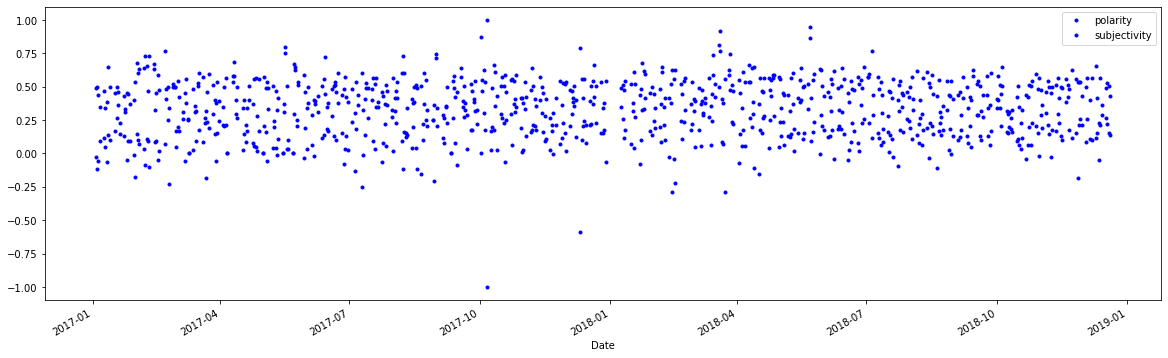

In [109]:
# no stationarity performed on these metrics
X.plot(figsize=(20,6), style= '.b');

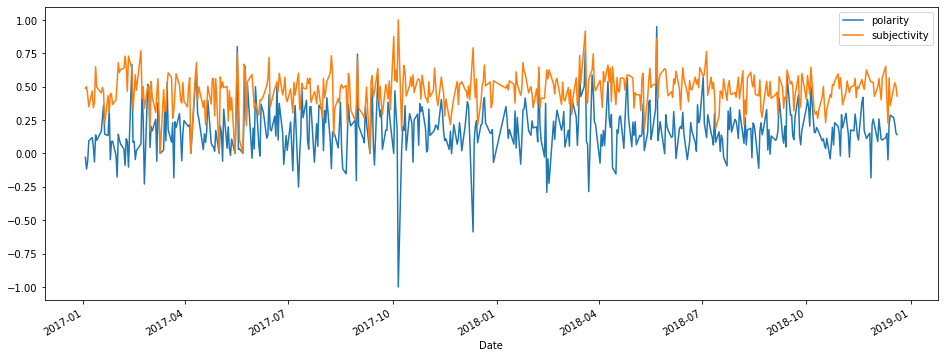

In [108]:
X.plot(figsize = (16,6));

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C0FF82CFD0>,
      dtype=object)

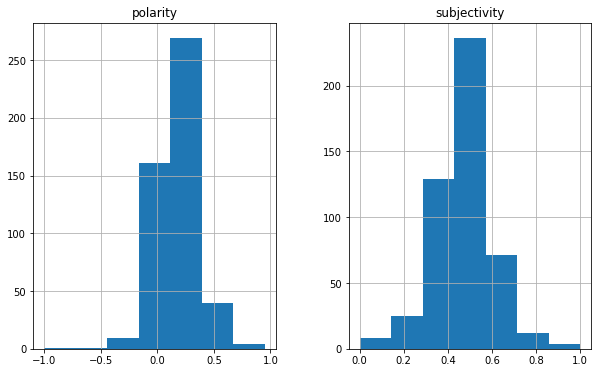

In [106]:
X.hist(figsize= (10,6), bins= 7)

In [80]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.20, random_state=42) 

##### RandomForestRegressor

In [81]:
# Instantiate and fit a RandomForestRegressor
# utilizing hyperparameters from exhaustive GridSearchCV
rfr = RandomForestRegressor(criterion = 'mse', 
                            max_depth = 5, 
                            max_features = 'log2', 
                            n_estimators = 100, 
                            n_jobs = -1) 
rfr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=5, max_features='log2', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=-1, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [82]:
# Feature importance
rfr.feature_importances_

array([0.50114917, 0.49885083])

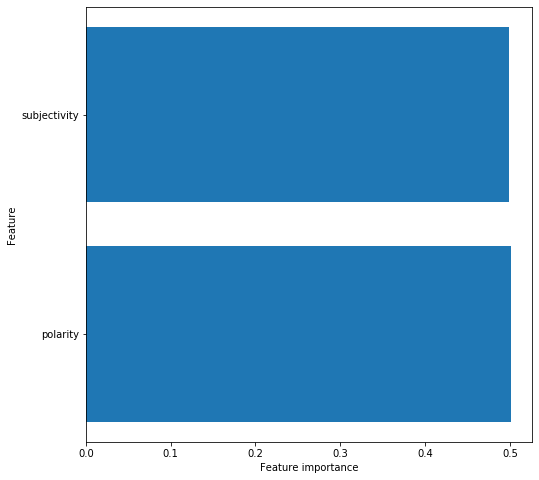

In [83]:
# subjectivity seems like a slightly better feature than polarity
def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(8,8))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    
    
plot_feature_importances(rfr)

In [84]:
# Use the forest's predict method on the test data
predictions = rfr.predict(X_test)

In [85]:
# Calculate the absolute errors
errors = abs(predictions - y_test)

# Print out the mean absolute error (mae)
print('Average model error:', round(np.mean(errors), 2), 'degrees.')

Average model error: 0.01 degrees.


In [86]:
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Accuracy: 92.53 %.


In [87]:
# root mean squared error
rsme = math.sqrt(mean_squared_error(y_test, predictions))
rsme

0.008979695741221544

##### Hyperparameter tuning

In [88]:
# # GridSearchCV
# gsc = GridSearchCV(estimator = RandomForestRegressor(),
# param_grid = {
#     'criterion': ('mse', 'mae'),
#     'max_depth': range(3, 7), 
#     'max_features': ('auto', 'sqrt','log2'), 
#     'n_estimators': (10 , 50, 100, 1000),
#     'n_jobs': (None, -1),
#     }, cv = 5, return_train_score= False)

# grid_result = gsc.fit(X, y)
# best_params = grid_result.best_params_

# rfr = RandomForestRegressor(criterion = best_params['criterion'],
#                            max_depth = best_params['max_depth'],
#                            max_features = best_params['max_features'],
#                            n_estimators = best_params['n_estimators'],
#                            n_jobs = best_params['n_jobs'], 
#                             random_state= False, verbose= False)


# gsc.cv_results_

In [89]:
# # results from GridSearchCV saved in pandas DataFrame obj
# df = pd.DataFrame(gsc.cv_results_)
# df.columns

In [90]:
# filtering dataframe results
#df[['param_criterion', 'param_max_depth', 'param_n_estimators', 'params', 'mean_test_score']]

In [91]:
# let's me know what methods and attributes are available for this obj
#dir(gsc)

In [92]:
# # best hyperparameters
# gsc.best_estimator_

# # RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
# #                       max_depth=5, max_features='log2', max_leaf_nodes=None,
# #                       max_samples=None, min_impurity_decrease=0.0,
# #                       min_impurity_split=None, min_samples_leaf=1,
# #                       min_samples_split=2, min_weight_fraction_leaf=0.0,
# #                       n_estimators=100, n_jobs=-1, oob_score=False,
# #                       random_state=None, verbose=0, warm_start=False)

In [93]:
# # best score
# gsc.best_score_

# #-14.72446175347468

In [94]:
# # best parameters
# gsc.best_params_

# # {'criterion': 'mse',
# #  'max_depth': 5,
# #  'max_features': 'log2',
# #  'n_estimators': 100,
# #  'n_jobs': -1}

##### Tweet Word Cloud

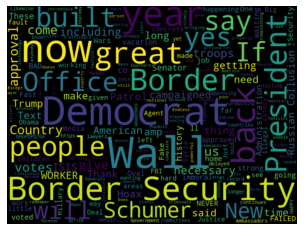

In [95]:
words = ' '.join([tweet for tweet in Twts['text']])
wordCloud = WordCloud(width=800, height=600, random_state= 21, max_font_size= 120).generate(words)

plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

### Interpret: